### Cleaning and merging data 
### Aggregate the data:

Count the number of EVs per state.

Count the number of charging stations per state.

Combine this with each state’s median household income.

In [629]:
import pandas as pd
import numpy as np

# Load datasets
ev = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\Electric_Vehicle_Population_Data.csv")
stations = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\alt_fuel_stations (Oct 12 2025).csv", low_memory=False)
income = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\ACSST1Y2024.S1903-Data.csv")

# Check data shapes
print("EV dataset shape:", ev.shape)
print("Charging dataset shape:", stations.shape)
print("Income dataset shape:", income.shape)
print("EV Columns:", ev.columns.tolist())
print("Charging Columns:", stations.columns.tolist()[:10])   # only first 10
print("Income Columns:", income.columns.tolist()[:10])



EV dataset shape: (112634, 17)
Charging dataset shape: (83830, 75)
Income dataset shape: (57, 243)
EV Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']
Charging Columns: ['Fuel Type Code', 'Station Name', 'Street Address', 'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4', 'Station Phone', 'Status Code']
Income Columns: ['GEO_ID', 'NAME', 'S1903_C01_001E', 'S1903_C01_001M', 'S1903_C01_002E', 'S1903_C01_002M', 'S1903_C01_003E', 'S1903_C01_003M', 'S1903_C01_004E', 'S1903_C01_004M']


## EV Population Dataset

In [630]:
# === EV dataset cleaning ===
import pandas as pd

# Load your dataset
ev = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\Electric_Vehicle_Population_Data.csv")

# Clean column names
ev.columns = ev.columns.str.strip()

# Select important columns
ev = ev[['State', 'Model Year', 'Electric Range', 'Electric Vehicle Type']]

# Rename for consistency
ev = ev.rename(columns={
    'State': 'state',
    'Model Year': 'model_year',
    'Electric Range': 'electric_range',
    'Electric Vehicle Type': 'vehicle_type'
})

# Drop rows with missing states and duplicates
ev = ev.dropna(subset=['state'])
ev.drop_duplicates(inplace=True)

print("Cleaned EV dataset shape:", ev.shape)
print(ev.head())
print("Unique states:", ev['state'].nunique())
print(sorted(ev['state'].unique()))
ev_state = ev.groupby('state').size().reset_index(name='EV_Count')
print(ev_state.sort_values('EV_Count', ascending=False).head())

ev.to_csv(r"C:\Users\palicher\Downloads\DATA\processed/ev_cleaned.csv", index=False)
print(r"C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv'")



Cleaned EV dataset shape: (479, 4)
  state  model_year  electric_range                            vehicle_type
0    FL        2022              42  Plug-in Hybrid Electric Vehicle (PHEV)
1    NV        2013              38  Plug-in Hybrid Electric Vehicle (PHEV)
2    WA        2011              73          Battery Electric Vehicle (BEV)
3    WA        2017             238          Battery Electric Vehicle (BEV)
4    WA        2019              26  Plug-in Hybrid Electric Vehicle (PHEV)
Unique states: 45
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WY']
   state  EV_Count
42    WA       268
4     CA        38
41    VA        22
18    MD        21
39    TX        11
C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv'


### Charging Stations Dataset

In [631]:

import pandas as pd

# === Load Data ===
stations = pd.read_csv(
    r"C:\Users\palicher\Downloads\DATA\alt_fuel_stations (Oct 12 2025).csv",
    low_memory=False
)

# === Clean column names ===
stations.columns = stations.columns.str.strip()

print("Columns:", stations.columns.tolist())

# === Keep only electric charging stations ===
stations = stations[stations['Fuel Type Code'] == 'ELEC']

# === Select important columns ===
stations = stations[['State', 'Status Code', 'EV Connector Types', 'Access Days Time']]

# === Rename for consistency ===
stations = stations.rename(columns={
    'State': 'state',
    'Status Code': 'status',
    'EV Connector Types': 'connector_types',
    'Access Days Time': 'access_time'
})

# === Drop missing + duplicates ===
stations = stations.dropna(subset=['state'])
stations.drop_duplicates(inplace=True)

# === Keep only ACTIVE stations (Status 'E') ===
stations_active = stations[stations['status'] == 'E']

# === Aggregate: count active stations per state ===
stations_state = (
    stations_active.groupby('state')
    .size()
    .reset_index(name='station_count')
)

# === Inspect summary ===
print(" Total unique states with active stations:", stations_state['state'].nunique())

print("\n Top 10 states by active charging stations:")
print(stations_state.sort_values(by='station_count', ascending=False).head(10))

print("\n Bottom 10 states by active charging stations:")
print(stations_state.sort_values(by='station_count', ascending=True).head(10))



stations_state.to_csv(r"C:\Users\palicher\Downloads\DATA\processed/stations_state.csv", index=False)
print(r"C:\Users\palicher\Downloads\DATA\processed/stations_state.csv'")





Columns: ['Fuel Type Code', 'Station Name', 'Street Address', 'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4', 'Station Phone', 'Status Code', 'Expected Date', 'Groups With Access Code', 'Access Days Time', 'Cards Accepted', 'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network', 'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude', 'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name', 'Open Date', 'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump', 'EV Connector Types', 'Country', 'Intersection Directions (French)', 'Access Days Time (French)', 'BD Blends (French)', 'Groups With Access Code (French)', 'Hydrogen Is Retail', 'Access Code', 'Access Detail Code', 'Federal Agency Code', 'Facility Type', 'CNG Dispenser Num', 'CNG On-Site Renewable Source', 'CNG Total Compression Capacity', 'CNG Storage Capacity', 

## Income dataset

In [632]:
import pandas as pd

# Reload fresh
income = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\ACSST1Y2024.S1903-Data.csv")

print("=== Columns ===")
for col in income.columns:
    print(f"[{col}]")

print("\n=== First 10 rows ===")
print(income.head(10))





=== Columns ===
[GEO_ID]
[NAME]
[S1903_C01_001E]
[S1903_C01_001M]
[S1903_C01_002E]
[S1903_C01_002M]
[S1903_C01_003E]
[S1903_C01_003M]
[S1903_C01_004E]
[S1903_C01_004M]
[S1903_C01_005E]
[S1903_C01_005M]
[S1903_C01_006E]
[S1903_C01_006M]
[S1903_C01_007E]
[S1903_C01_007M]
[S1903_C01_008E]
[S1903_C01_008M]
[S1903_C01_009E]
[S1903_C01_009M]
[S1903_C01_010E]
[S1903_C01_010M]
[S1903_C01_011E]
[S1903_C01_011M]
[S1903_C01_012E]
[S1903_C01_012M]
[S1903_C01_013E]
[S1903_C01_013M]
[S1903_C01_014E]
[S1903_C01_014M]
[S1903_C01_015E]
[S1903_C01_015M]
[S1903_C01_016E]
[S1903_C01_016M]
[S1903_C01_017E]
[S1903_C01_017M]
[S1903_C01_018E]
[S1903_C01_018M]
[S1903_C01_019E]
[S1903_C01_019M]
[S1903_C01_020E]
[S1903_C01_020M]
[S1903_C01_021E]
[S1903_C01_021M]
[S1903_C01_022E]
[S1903_C01_022M]
[S1903_C01_023E]
[S1903_C01_023M]
[S1903_C01_024E]
[S1903_C01_024M]
[S1903_C01_025E]
[S1903_C01_025M]
[S1903_C01_026E]
[S1903_C01_026M]
[S1903_C01_027E]
[S1903_C01_027M]
[S1903_C01_028E]
[S1903_C01_028M]
[S1903_C01_029E]

In [633]:
# Try reading while skipping metadata rows
income = pd.read_csv(
    r"C:\Users\palicher\Downloads\DATA\ACSST1Y2024.S1903-Data.csv",
    skiprows=1,  # skip top line (metadata)
    low_memory=False
)
print(income.head(10))
print(income.columns.tolist())
[col for col in income.columns if "Median income" in col]



     Geography  Geographic Area Name  \
0  0400000US01               Alabama   
1  0400000US02                Alaska   
2  0400000US04               Arizona   
3  0400000US05              Arkansas   
4  0400000US06            California   
5  0400000US08              Colorado   
6  0400000US09           Connecticut   
7  0400000US10              Delaware   
8  0400000US11  District of Columbia   
9  0400000US12               Florida   

   Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households  \
0                                            2059528                                                     
1                                             274045                                                     
2                                            2982475                                                     
3                                            1246754                                                     
4                            

['Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households',
 'Margin of Error!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households',
 'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White',
 'Margin of Error!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White',
 'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American',
 'Margin of Error!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American',
 'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Ameri

In [634]:


# === Clean Column Names ===
income.columns = income.columns.str.strip()

# === Automatically Detect Columns ===
# This ensures flexibility in case of slight column name differences
name_col = [c for c in income.columns if "Geographic Area Name" in c][0]
income_col = [c for c in income.columns if "Median income" in c][0]

print("Detected columns:")
print("State column:", name_col)
print("Income column:", income_col)

# === Select and Rename Columns ===
income = income[[name_col, income_col]]
income = income.rename(columns={
    name_col: 'state',
    income_col: 'median_income'
})

# === Clean Numeric Values ===
income['median_income'] = (
    income['median_income']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)
income['median_income'] = pd.to_numeric(income['median_income'], errors='coerce')

# === Drop Missing or Invalid Rows ===
income = income.dropna(subset=['median_income']).sort_values(by='state').reset_index(drop=True)

# === Optional: Aggregate by State (safety step) ===
income_state = (
    income.groupby('state', as_index=False)['median_income']
    .mean()
    .sort_values(by='state')
    .reset_index(drop=True)
)

# === Display Summary ===
print(" Cleaned Income dataset shape:", income_state.shape)
print(income_state.head(10))

# === Save Cleaned File ===
income_state.to_csv(r"C:\Users\palicher\Downloads\DATA\processed/income_cleaned.csv", index=False)
print(r"C:\Users\palicher\Downloads\DATA\processed/income_cleaned.csv'")



import us

# Function to safely convert full state names to abbreviations
def to_abbrev(state_name):
    state = us.states.lookup(state_name)
    if state:
        return state.abbr
    else:
        return state_name  # keep as is if already an abbreviation or not found

# Apply conversion
income_state['state'] = income_state['state'].apply(to_abbrev)

# Make sure everything is uppercase and clean
income_state['state'] = income_state['state'].str.strip().str.upper()

print("After conversion — unique values in income_state:")
print(income_state['state'].unique()[:10])




Detected columns:
State column: Geographic Area Name
Income column: Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households
 Cleaned Income dataset shape: (56, 2)
                  state  median_income
0               Alabama        66659.0
1                Alaska        95665.0
2               Arizona        81486.0
3              Arkansas        62106.0
4            California       100149.0
5              Colorado        97113.0
6           Connecticut        96049.0
7              Delaware        87534.0
8  District of Columbia       109707.0
9               Florida        77735.0
C:\Users\palicher\Downloads\DATA\processed/income_cleaned.csv'
After conversion — unique values in income_state:
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DISTRICT OF COLUMBIA' 'FL']


Clean the state columns and filter only us state just incase

In [635]:
# Make state column consistent (trim and uppercase)
ev_state['state'] = ev_state['state'].str.strip().str.upper()
stations_state['state'] = stations_state['state'].str.strip().str.upper()
income_state['state'] = income_state['state'].str.strip().str.upper()
valid_states = ev_state['state'].unique()
income_state = income_state[income_state['state'].isin(valid_states)]


# Population Dataset

In [636]:
import pandas as pd

# --- STEP 1: Try reading a few rows without assuming any header ---
file_path = r"C:\Users\palicher\Downloads\DATA\state_population.csv.xlsx"

print(" Inspecting first 15 rows (raw, no header)...\n")
raw_preview = pd.read_excel(file_path, header=None)
print(raw_preview.head(15))

# --- STEP 2: Show sheet names (sometimes data is in a different sheet) ---
xls = pd.ExcelFile(file_path)
print("\n Sheet names in this Excel file:", xls.sheet_names)

# --- STEP 3: Peek at what columns appear if you skip first 5–10 rows ---
for skip in [0, 5, 8, 9, 10]:
    print(f"\n---- skiprows={skip} ----")
    try:
        df_try = pd.read_excel(file_path, skiprows=skip)
        print(df_try.head(3))
        print("Columns detected:", list(df_try.columns))
    except Exception as e:
        print("Error:", e)



 Inspecting first 15 rows (raw, no header)...

                                                    0  \
0   table with row headers in column A and column ...   
1   Annual Estimates of the Resident Population fo...   
2                                     Geographic Area   
3                                                 NaN   
4                                       United States   
5                                           Northeast   
6                                             Midwest   
7                                               South   
8                                                West   
9                                            .Alabama   
10                                            .Alaska   
11                                           .Arizona   
12                                          .Arkansas   
13                                        .California   
14                                          .Colorado   

                               1        

In [637]:
import pandas as pd
import re
import numpy as np

path = r"C:\Users\palicher\Downloads\DATA\state_population.csv.xlsx"

# 1) Read raw (no header), find the header row containing "Geographic Area"
raw = pd.read_excel(path, header=None, sheet_name=0)
hdr_idx = int(raw.index[raw.iloc[:,0].astype(str).str.contains("Geographic Area", case=False, na=False)][0])

# 2) Build a combined header from two rows: main + subheader (years)
header_main = raw.iloc[hdr_idx].astype(str).fillna("")
header_sub  = raw.iloc[hdr_idx+1].astype(str).fillna("")

def combine(h_main, h_sub):
    out = []
    for a, b in zip(h_main, h_sub):
        b_clean = b.strip()
        if re.fullmatch(r"20\d{2}", b_clean):  # e.g., 2020/2021/2022/2023
            out.append(f"{a} {b_clean}".strip())
        else:
            out.append(a.strip())
    return out

columns = combine(header_main, header_sub)

# 3) Data starts after the two header rows
df = raw.iloc[hdr_idx+2:].copy()
df.columns = columns

# 4) Find the 2023 population column (or fall back to the latest year available)
pop_prefix = "Population Estimate (as of July 1)"
cands = [c for c in df.columns if c.startswith(pop_prefix)]
year_cols = [c for c in cands if re.search(r"\b20\d{2}\b", c)]

# Prefer 2023; else pick max year
target_col = None
for c in year_cols:
    if c.endswith("2023"):
        target_col = c
        break
if target_col is None and year_cols:
    # pick the largest year among the candidates
    target_col = max(year_cols, key=lambda c: int(re.search(r"(20\d{2})", c).group(1)))

if not target_col:
    raise RuntimeError(f"Couldn't find a year under '{pop_prefix}'. Columns seen: {df.columns.tolist()}")

name_col = "Geographic Area" if "Geographic Area" in df.columns else df.columns[0]

pop = df[[name_col, target_col]].rename(columns={name_col: "state", target_col: "population"})

# 5) Clean state names (strip leading dots) and drop aggregates
pop["state"] = pop["state"].astype(str).str.strip().str.lstrip(".")
drop_states = {"United States", "Northeast", "Midwest", "South", "West"}
mask_drop = (
    pop["state"].isin(drop_states) |
    pop["state"].str.contains(r"District of Columbia|Puerto Rico|Region|Division|Geographic Area", case=False, na=False)
)
pop = pop[~mask_drop]

# 6) Numeric population
pop["population"] = (
    pop["population"].astype(str)
        .str.replace(",", "", regex=True)
        .str.replace("\u00A0", "", regex=True)
)
pop["population"] = pd.to_numeric(pop["population"], errors="coerce")
pop = pop.dropna(subset=["population"]).reset_index(drop=True)

# 7) Save
out_path = r"C:\Users\palicher\Downloads\DATA\population_cleaned.csv"
pop.to_csv(out_path, index=False, encoding="utf-8")
print("Saved:", out_path)
print(pop.head(), "\nPicked column:", target_col)


Saved: C:\Users\palicher\Downloads\DATA\population_cleaned.csv
        state  population
0     Alabama   5033094.0
1      Alaska    733017.0
2     Arizona   7187135.0
3    Arkansas   3014546.0
4  California  39521958.0 
Picked column: Population Estimate (as of July 1) 2020


# Merge all data sets 

In [638]:
import pandas as pd
import numpy as np
import re

# ---------- FILES ----------
ev_path       = r"C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv"
stations_path = r"C:\Users\palicher\Downloads\DATA\processed\stations_state.csv"
income_path   = r"C:\Users\palicher\Downloads\DATA\processed\income_cleaned.csv"
pop_path      = r"C:\Users\palicher\Downloads\DATA\population_cleaned.csv"
out_path      = r"C:\Users\palicher\Downloads\DATA\processed\ev_charging_income_state.csv"

# ---------- STATE MAPS ----------
USPS_TO_STATE = {
    "AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut",
    "DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana",
    "IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts",
    "MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada",
    "NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota",
    "OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina",
    "SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington",
    "WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming","DC":"District of Columbia"
}
STATE_TO_USPS = {v:k for k,v in USPS_TO_STATE.items()}
VALID_CODES = set(USPS_TO_STATE.keys())

def norm(s): return re.sub(r"\s+", " ", str(s)).strip()

def find_state_col(df):
    for c in ["state","State","state_name","STATE","jurisdiction","Jurisdiction","Geographic Area","Geographic Area Name"]:
        if c in df.columns: return c
    obj = [c for c in df.columns if df[c].dtype==object]
    return max(obj, key=lambda c: df[c].astype(str).str.strip().nunique()) if obj else df.columns[0]

def to_usps(series):
    s = series.astype(str).str.strip().str.replace(r"^\.", "", regex=True)
    # already 2-letter?
    code_mask = (s.str.len()==2) & s.str.match(r"^[A-Za-z]{2}$")
    out = s.str.upper().where(code_mask, s)
    # map names -> codes
    name_mask = ~code_mask
    names = out.where(~name_mask, out[name_mask].str.title()
                      .str.replace(r"\s+", " ", regex=True)
                      .str.replace("District Of Columbia","District of Columbia"))
    mapped = names.map(STATE_TO_USPS)
    out = out.where(code_mask, mapped)
    return out

def best_numeric_col(df, exclude_regex=r"(year|code|id|zip|fips)", prefer_large=True):
    candidates = []
    for c in df.columns:
        # skip obvious key columns
        if re.search(exclude_regex, str(c), re.I): 
            continue
        ser = pd.to_numeric(df[c], errors="coerce")
        if ser.notna().mean() >= 0.5:
            candidates.append((ser.sum(skipna=True), ser.mean(skipna=True), c))
    if not candidates:
        return None
    # prefer largest sum (fallback: largest mean)
    candidates.sort(key=lambda x: (x[0] if prefer_large else x[1]))
    return candidates[-1][2]

def detect_col(df, kind):
    # Expanded patterns
    if kind == "EV_Count":
        patterns = [
            r"electric.*vehicle", r"\bev[\s_-]*count\b", r"\bevs?\b", r"\bev total\b",
            r"registered ev", r"ev registrations", r"\bev\s*units\b", r"\bev\s*number\b",
            r"\bev\s*inventory\b", r"light[-\s]*duty.*ev", r"ev.*registered"
        ]
    elif kind == "station_count":
        patterns = [
            r"station[\s_-]*count", r"charging.*stations?", r"\bstations?\b", r"total[\s_-]*stations?",
            r"public.*stations?", r"evse.*(count|ports?)", r"ports?\b"
        ]
    elif kind == "median_income":
        patterns = [r"\bmedian[\s_-]*income\b", r"\bincome\b", r"household.*income", r"median.*household.*income"]
    else:  # population
        patterns = [r"\bpopulation\b", r"\bpop(ulation)?\b"]

    # keyword pass
    hits = [c for c in df.columns if any(re.search(p, norm(c).lower()) for p in patterns)]
    if hits:
        # choose the most numeric-looking
        nums = []
        for c in hits:
            ser = pd.to_numeric(df[c], errors="coerce")
            nums.append((ser.notna().mean(), ser.sum(skipna=True), c))
        nums.sort(key=lambda x: (x[0], x[1]))  # coverage then sum
        return nums[-1][2]

    # fallback: numeric with largest sum
    fallback = best_numeric_col(df)
    return fallback

def prep_min(df, kind):
    st = find_state_col(df)
    df = df.rename(columns={st:"state_raw"}).copy()
    df["state_usps"] = to_usps(df["state_raw"])
    df = df[df["state_usps"].isin(VALID_CODES)]  # keep only real states
    val = detect_col(df, kind)
    if not val:
        raise KeyError(f"Could not detect a '{kind}' column in file with columns: {list(df.columns)}")
    df = df.rename(columns={val:kind})
    df[kind] = pd.to_numeric(df[kind], errors="coerce")
    return df[["state_usps", kind]], val, st

# ---------- LOAD ----------
ev_df       = pd.read_csv(ev_path)
stations_df = pd.read_csv(stations_path)
income_df   = pd.read_csv(income_path)
pop_df      = pd.read_csv(pop_path)

# ---------- PREP + DIAGNOSTICS ----------
ev_min, ev_val_col, ev_state_col = prep_min(ev_df, "EV_Count")
stations_min, st_val_col, st_state_col = prep_min(stations_df, "station_count")
income_min, inc_val_col, inc_state_col = prep_min(income_df, "median_income")
pop_min, pop_val_col, pop_state_col = prep_min(pop_df, "population")

print("Detected columns per file:")
print({
    "ev_cleaned.csv":       {"state_col": ev_state_col, "value_col": ev_val_col},
    "stations_state.csv":   {"state_col": st_state_col, "value_col": st_val_col},
    "income_cleaned.csv":   {"state_col": inc_state_col, "value_col": inc_val_col},
    "population_cleaned.csv":{"state_col": pop_state_col, "value_col": pop_val_col},
})

# ---------- AGGREGATE TO ONE ROW / STATE ----------
ev_min       = ev_min.groupby("state_usps", as_index=False)["EV_Count"].sum()
stations_min = stations_min.groupby("state_usps", as_index=False)["station_count"].sum()
income_min   = income_min.groupby("state_usps", as_index=False)["median_income"].mean()
pop_min      = pop_min.groupby("state_usps", as_index=False)["population"].sum()

# ---------- MERGE ----------
merged = (
    ev_min.merge(stations_min, on="state_usps", how="inner")
          .merge(income_min,   on="state_usps", how="inner")
          .merge(pop_min,      on="state_usps", how="left")
)

# add full state name
merged["state"] = merged["state_usps"].map(USPS_TO_STATE)

# ---------- FEATURES ----------
merged["EV_per_1000_pop"]       = merged["EV_Count"]      / merged["population"].replace(0, np.nan) * 1000
merged["Stations_per_100k_pop"] = merged["station_count"] / merged["population"].replace(0, np.nan) * 100000
merged["EV_per_station"]        = merged["EV_Count"]      / merged["station_count"].replace(0, np.nan)

inc_mean = merged["median_income"].mean(skipna=True)
merged["Income_Index"] = merged["median_income"] / (inc_mean if pd.notna(inc_mean) and inc_mean!=0 else np.nan)

# ---------- ORDER ----------
cols = ["state","state_usps","EV_Count","station_count","median_income","population",
        "EV_per_1000_pop","Stations_per_100k_pop","EV_per_station","Income_Index"]
merged = merged[cols]

# ---------- SAVE ----------
merged.to_csv(out_path, index=False, encoding="utf-8")
print(" Final merged dataset shape:", merged.shape)
print(merged.head(12))
print(f" Saved to: {out_path}")


Detected columns per file:
{'ev_cleaned.csv': {'state_col': 'state', 'value_col': 'electric_range'}, 'stations_state.csv': {'state_col': 'state', 'value_col': 'station_count'}, 'income_cleaned.csv': {'state_col': 'state', 'value_col': 'median_income'}, 'population_cleaned.csv': {'state_col': 'state', 'value_col': 'population'}}
 Final merged dataset shape: (45, 10)
                   state state_usps  EV_Count  station_count  median_income  \
0                 Alaska         AK        19             25        95665.0   
1                Alabama         AL        42             49        66659.0   
2               Arkansas         AR       486             49        62106.0   
3                Arizona         AZ       349             92        81486.0   
4             California         CA      3259            592       100149.0   
5               Colorado         CO       914            132        97113.0   
6            Connecticut         CT       170            114        96049.0   


# Import & Setup 

In [639]:
# ── 0. Setup
import os, json, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

# mapping
import plotly.express as px

# paths
DATA_DIR = "/mnt/data"

# Use these if your files are on your Windows drive
MERGED       = r"C:\Users\palicher\Downloads\DATA\processed\ev_charging_income_state.csv"
EV           = r"C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv"
STATIONS     = r"C:\Users\palicher\Downloads\DATA\processed\stations_state.csv"
INCOME       = r"C:\Users\palicher\Downloads\DATA\processed\income_cleaned.csv"
ACS          = r"C:\Users\palicher\Downloads\DATA\ACSST1Y2024.S1903-Data.csv"
ALT_STATIONS = r"C:\Users\palicher\Downloads\DATA\alt_fuel_stations (Oct 12 2025).csv"



os.makedirs("data", exist_ok=True)

# load
df = pd.read_csv(MERGED, low_memory=False)
df_ev = pd.read_csv(EV, low_memory=False)
df_st = pd.read_csv(STATIONS, low_memory=False)
df_inc = pd.read_csv(INCOME, low_memory=False)

# optional loads if needed later
try:
    df_acs = pd.read_csv(ACS, low_memory=False)
except Exception:
    df_acs = None
try:
    df_alt = pd.read_csv(ALT_STATIONS, low_memory=False)
except Exception:
    df_alt = None

print("Loaded:", df.shape, "| cols:", list(df.columns)[:12], "...")


Loaded: (45, 10) | cols: ['state', 'state_usps', 'EV_Count', 'station_count', 'median_income', 'population', 'EV_per_1000_pop', 'Stations_per_100k_pop', 'EV_per_station', 'Income_Index'] ...


In [640]:
# Basic Info
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

# Summary Statistics
display(df.describe().T)


Rows: 45
Columns: 10

Column Names: ['state', 'state_usps', 'EV_Count', 'station_count', 'median_income', 'population', 'EV_per_1000_pop', 'Stations_per_100k_pop', 'EV_per_station', 'Income_Index']

Data Types:
state                     object
state_usps                object
EV_Count                   int64
station_count              int64
median_income            float64
population               float64
EV_per_1000_pop          float64
Stations_per_100k_pop    float64
EV_per_station           float64
Income_Index             float64
dtype: object

Missing Values:
state                    0
state_usps               0
EV_Count                 0
station_count            0
median_income            0
population               1
EV_per_1000_pop          1
Stations_per_100k_pop    1
EV_per_station           0
Income_Index             0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
EV_Count,45.0,8.984889e+02,3.220548e+03,0.000000,3.300000e+01,2.470000e+02,5.320000e+02,2.161600e+04
station_count,45.0,9.066667e+01,8.833794e+01,20.000000,3.900000e+01,7.400000e+01,1.280000e+02,5.920000e+02
median_income,45.0,8.258080e+04,1.313948e+04,59127.000000,7.395800e+04,7.999100e+04,9.566500e+04,1.097070e+05
population,44.0,6.984787e+06,7.764129e+06,577681.000000,2.079801e+06,4.842698e+06,7.954810e+06,3.952196e+07
EV_per_1000_pop,44.0,1.469691e-01,4.257307e-01,0.000000,8.475852e-03,3.733679e-02,1.109705e-01,2.797388e+00
Stations_per_100k_pop,44.0,1.886334e+00,1.178938e+00,0.560884,1.096399e+00,1.480274e+00,2.259519e+00,5.642799e+00
EV_per_station,45.0,8.680646e+00,2.502310e+01,0.000000,7.600000e-01,2.742188e+00,7.151515e+00,1.675659e+02
Income_Index,45.0,1.000000e+00,1.591106e-01,0.715990,8.955835e-01,9.686392e-01,1.158441e+00,1.328481e+00


In [641]:
summary = {
    "Total States": len(df),
    "Mean EV Count": int(df['EV_Count'].mean()),
    "Median EV Count": int(df['EV_Count'].median()),
    "Mean Stations": int(df['station_count'].mean()),
    "Median Income (USD)": int(df['median_income'].median()),
    "Top State by EVs": df.loc[df['EV_Count'].idxmax(), 'state'],
    "Top State by Stations": df.loc[df['station_count'].idxmax(), 'state']
}
pd.DataFrame(summary, index=['Summary']).T


,Summary
Total States,45
Mean EV Count,898
Median EV Count,247
Mean Stations,90
Median Income (USD),79991
Top State by EVs,Washington
Top State by Stations,California


In [642]:
# ===========================================================
# EV Feature Engineering and Aggregation by State
# ===========================================================

import pandas as pd

# Load cleaned EV dataset
ev = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv")

print(" Loaded EV dataset:", ev.shape)
print("Columns:", ev.columns.tolist())

# --- Basic Checks ---
print("\nUnique States:", ev['state'].nunique())
print("Vehicle Types:", ev['vehicle_type'].unique().tolist())

# --- Group by state ---
# 1. Count of EVs per state
ev_count = ev.groupby('state').size().reset_index(name='EV_Count')

# 2. Average electric range per state
ev_range = ev.groupby('state')['electric_range'].mean().reset_index(name='avg_range')

# 3. BEV vs PHEV ratio
type_counts = ev.groupby(['state','vehicle_type']).size().unstack(fill_value=0)
type_counts['BEV_ratio'] = (
    type_counts.get('Battery Electric Vehicle (BEV)', 0)
    / (type_counts.sum(axis=1) + 1e-5)
)
type_counts = type_counts.reset_index()[['state','BEV_ratio']]

# --- Merge them together ---
ev_state_summary = ev_count.merge(ev_range, on='state', how='left') \
                           .merge(type_counts, on='state', how='left')

# --- Add some derived columns ---
ev_state_summary['Range_Category'] = pd.cut(
    ev_state_summary['avg_range'],
    bins=[0, 100, 200, 300, 1000],
    labels=['Low (<100)', 'Moderate (100–200)', 'High (200–300)', 'Very High (>300)']
)

# --- Preview ---
print("\nAggregated EV State Summary:")
print(ev_state_summary.head())

# --- Save the processed dataset ---
ev_state_summary.to_csv("ev_state_summary.csv", index=False)
print("\n File saved: ev_state_summary.csv")

# --- Basic stats for report ---
print("\nDescriptive Statistics:")
display(ev_state_summary.describe().T)


 Loaded EV dataset: (479, 4)
Columns: ['state', 'model_year', 'electric_range', 'vehicle_type']

Unique States: 45
Vehicle Types: ['Plug-in Hybrid Electric Vehicle (PHEV)', 'Battery Electric Vehicle (BEV)']

Aggregated EV State Summary:
  state  EV_Count   avg_range  BEV_ratio      Range_Category
0    AK         1   19.000000   0.000000          Low (<100)
1    AL         1   42.000000   0.000000          Low (<100)
2    AR         4  121.500000   0.749998  Moderate (100–200)
3    AZ         5   69.800000   0.599999          Low (<100)
4    CA        38   85.763158   0.447368          Low (<100)

 File saved: ev_state_summary.csv

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
EV_Count,45.0,10.644444,39.811576,1.0,1.000000,3.000000,6.00000,268.000000
avg_range,45.0,79.055329,63.806776,0.0,26.333333,80.656716,121.50000,238.000000
BEV_ratio,45.0,0.577686,0.338633,0.0,0.428571,0.500000,0.99999,0.999997


# Univariate Analysis — Distributions of Each Feature

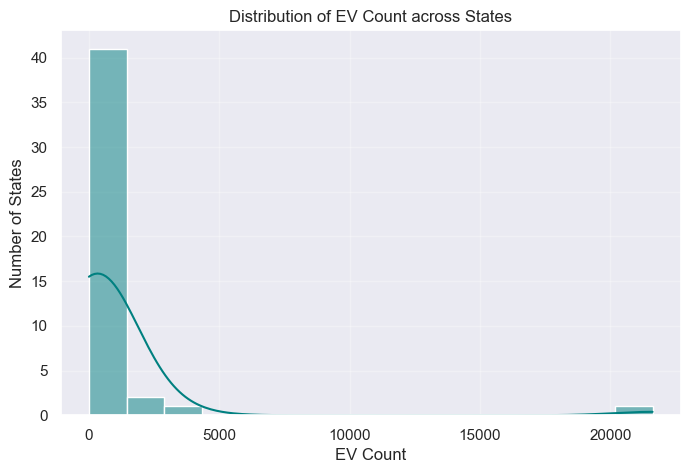

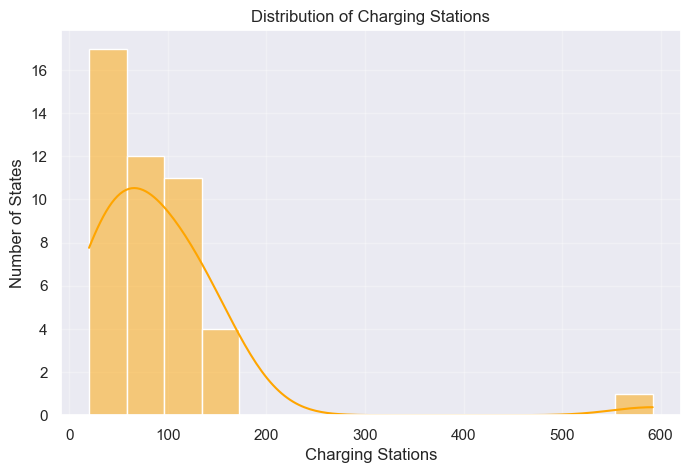

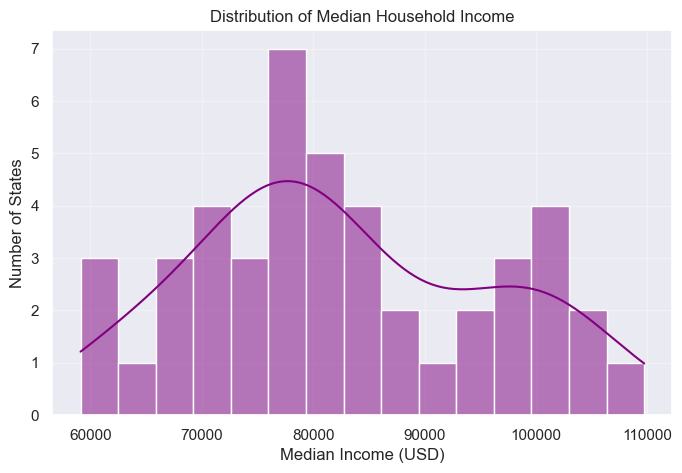

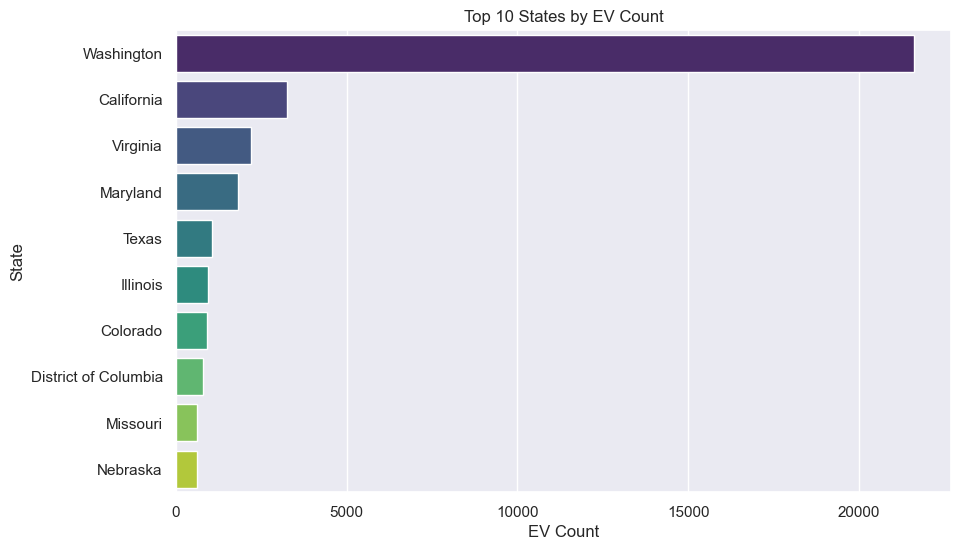

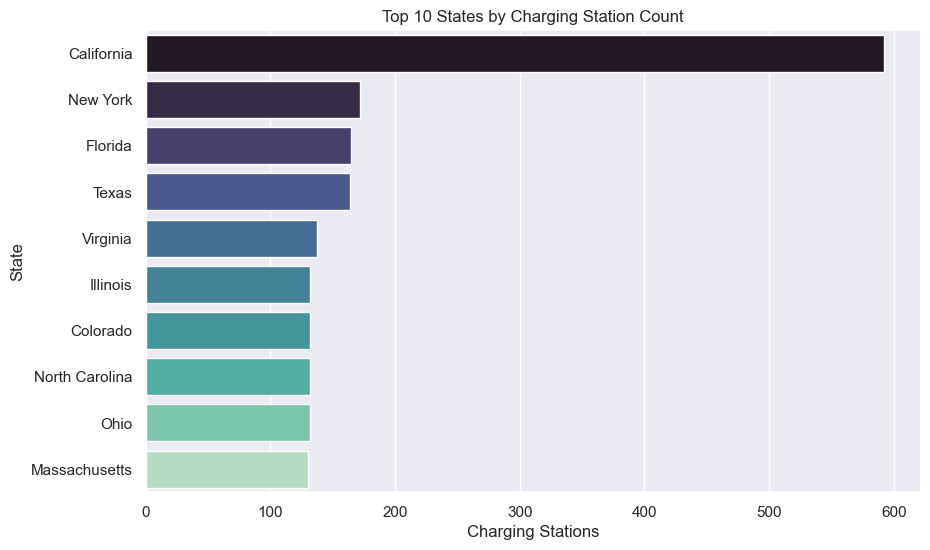

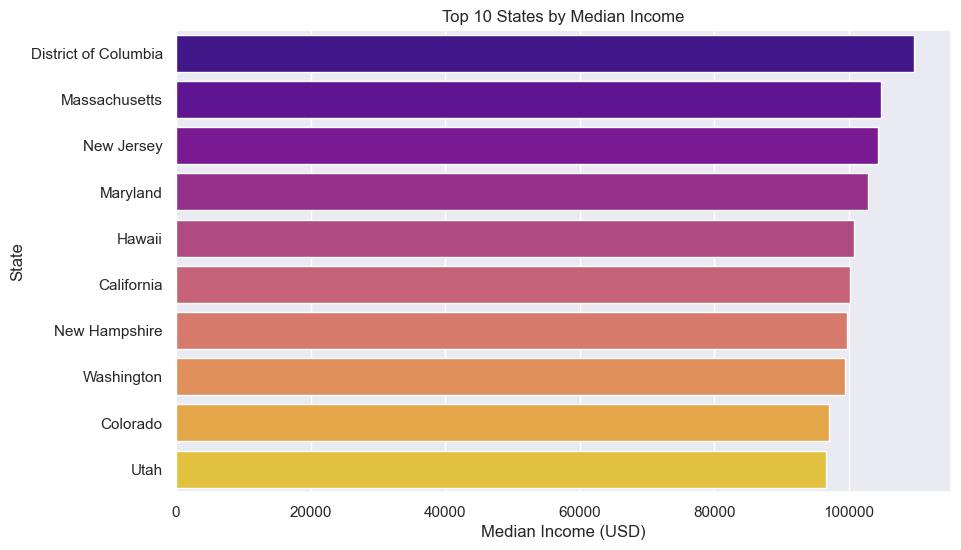

In [643]:
plt.figure(figsize=(8,5))
sns.histplot(df['EV_Count'], bins=15, kde=True, color='teal')
plt.title('Distribution of EV Count across States')
plt.xlabel('EV Count')
plt.ylabel('Number of States')
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['station_count'], bins=15, kde=True, color='orange')
plt.title('Distribution of Charging Stations')
plt.xlabel('Charging Stations')
plt.ylabel('Number of States')
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['median_income'], bins=15, kde=True, color='purple')
plt.title('Distribution of Median Household Income')
plt.xlabel('Median Income (USD)')
plt.ylabel('Number of States')
plt.grid(alpha=0.3)
plt.show()

top_ev = df.sort_values('EV_Count', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_ev, x='EV_Count', y='state', palette='viridis')
plt.title('Top 10 States by EV Count')
plt.xlabel('EV Count')
plt.ylabel('State')
plt.show()

top_st = df.sort_values('station_count', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_st, x='station_count', y='state', palette='mako')
plt.title('Top 10 States by Charging Station Count')
plt.xlabel('Charging Stations')
plt.ylabel('State')
plt.show()

top_income = df.sort_values('median_income', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_income, x='median_income', y='state', palette='plasma')
plt.title('Top 10 States by Median Income')
plt.xlabel('Median Income (USD)')
plt.ylabel('State')
plt.show()



# Outlier Detection

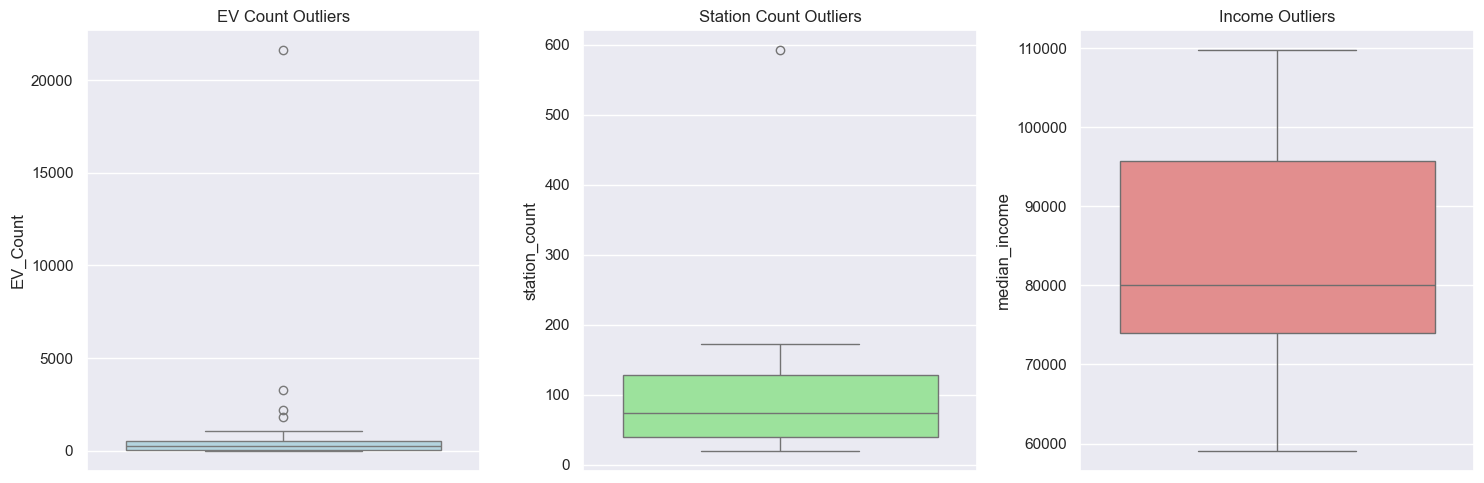

In [644]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(data=df, y='EV_Count', ax=axes[0], color='lightblue')
axes[0].set_title('EV Count Outliers')
sns.boxplot(data=df, y='station_count', ax=axes[1], color='lightgreen')
axes[1].set_title('Station Count Outliers')
sns.boxplot(data=df, y='median_income', ax=axes[2], color='lightcoral')
axes[2].set_title('Income Outliers')
plt.tight_layout()
plt.show()


In [645]:
Q1 = df[['EV_Count','station_count','median_income']].quantile(0.25)
Q3 = df[['EV_Count','station_count','median_income']].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df[['EV_Count','station_count','median_income']] < (Q1 - 1.5 * IQR)) |
                (df[['EV_Count','station_count','median_income']] > (Q3 + 1.5 * IQR)))
outliers = df[outlier_mask.any(axis=1)]
print("Potential Outlier States:")
display(outliers[['state','EV_Count','station_count','median_income']])


Potential Outlier States:


,state,EV_Count,station_count,median_income
4,California,3259,592,100149.0
18,Maryland,1816,88,102905.0
41,Virginia,2191,137,92090.0
42,Washington,21616,129,99389.0


# Harmonize Columns & cleaning

In [646]:
# ── 1. Light cleaning & column harmonization
def colfind(cols, *patterns, default=None):
    cols_l = [c.lower() for c in cols]
    for p in patterns:
        for i, c in enumerate(cols_l):
            if p in c:
                return cols[i]
    return default

# try to auto-detect key columns
STATE = colfind(df.columns, "state")
YEAR  = colfind(df.columns, "year")
POP   = colfind(df.columns, "pop", "population")
INCOME_COL = colfind(df.columns, "income", "median household")
EV_COUNT = colfind(df.columns, "ev_reg", "ev count", "evs", "registered")
ST_TOTAL = colfind(df.columns, "station", "total station", "evse", "ports")
ST_L2    = colfind(df.columns, "level 2", "l2")
ST_DCF   = colfind(df.columns, "dc fast", "dcfc", "fast")

key_map = dict(STATE=STATE, YEAR=YEAR, POP=POP, INCOME=INCOME_COL,
               EV_COUNT=EV_COUNT, ST_TOTAL=ST_TOTAL, ST_L2=ST_L2, ST_DCF=ST_DCF)
print("Detected:\n", key_map)

# minimal NA handling
for k,v in key_map.items():
    if v and v in df.columns:
        if df[v].dtype == "O":
            # coerce numerics when appropriate
            df[v] = pd.to_numeric(df[v].astype(str).str.replace(",","").str.extract(r"([-+]?\d*\.?\d+)")[0], errors="ignore")
df = df.drop_duplicates()


Detected:
 {'STATE': 'state', 'YEAR': None, 'POP': 'population', 'INCOME': 'median_income', 'EV_COUNT': None, 'ST_TOTAL': 'station_count', 'ST_L2': None, 'ST_DCF': None}


# Feature Engineering 

In [647]:
import numpy as np
import pandas as pd

def add_ev_features(
    df: pd.DataFrame,
    *,
    EV_COUNT='EV_Count',
    ST_TOTAL='station_count',
    ST_DCF='dc_fast_count',
    POP='population',
    INCOME_COL='median_income',
    YEAR='year',
    STATE='state'
) -> pd.DataFrame:
    df = df.copy()

    def series_or_nan(colname):
        return df[colname] if (colname and colname in df.columns) else pd.Series(np.nan, index=df.index)

    # --- Base series (safe) ---
    ev = series_or_nan(EV_COUNT)
    st = series_or_nan(ST_TOTAL)
    st_dcf = series_or_nan(ST_DCF)
    pop = series_or_nan(POP)
    inc = series_or_nan(INCOME_COL)

    # Avoid divide-by-zero (replace 0 with NaN for denominators)
    safe_pop_1k = pop.replace(0, np.nan) / 1000.0
    safe_pop_100k = pop.replace(0, np.nan) / 100000.0
    safe_st = st.replace(0, np.nan)

    # --- 1) Per-capita metrics ---
    df["EV_per_1000_pop"] = ev.div(safe_pop_1k)
    df["Stations_per_100k_pop"] = st.div(safe_pop_100k)

    # --- 2) Infrastructure efficiency ---
    df["EV_per_station"] = ev.div(safe_st)

    # --- 3) DC fast share ---
    df["DC_share"] = st_dcf.div(safe_st)

    # --- 4) Income index ---
    if INCOME_COL and (INCOME_COL in df.columns):
        inc_mean = inc.mean()
        df["Income_Index"] = inc / (inc_mean if inc_mean not in (0, np.nan) else np.nan)
    else:
        df["Income_Index"] = np.nan

    # --- 5) Growth (needs YEAR + STATE) ---
    if YEAR and (YEAR in df.columns) and STATE and (STATE in df.columns) and EV_COUNT and (EV_COUNT in df.columns):
        df = df.sort_values([STATE, YEAR])
        df["EV_count_prev"] = df.groupby(STATE)[EV_COUNT].shift(1)
        prev = df["EV_count_prev"].replace(0, np.nan)  # avoid /0
        df["EV_Growth"] = (df[EV_COUNT] - df["EV_count_prev"]).div(prev)
    else:
        df["EV_Growth"] = np.nan

    # --- 6) Income quartiles for equity/fairness ---
    if INCOME_COL and (INCOME_COL in df.columns):
        try:
            # duplicates='drop' handles many ties
            q = pd.qcut(df[INCOME_COL], 4, labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"], duplicates='drop')
            df["Income_Q"] = q
        except Exception:
            df["Income_Q"] = np.nan
    else:
        df["Income_Q"] = np.nan

    return df
df = add_ev_features(df)          # <-- capture the returned df
new_cols = [
    "EV_per_1000_pop","Stations_per_100k_pop","EV_per_station",
    "DC_share","Income_Index","EV_Growth","Income_Q"
]
display(df[new_cols].head(10))



,EV_per_1000_pop,Stations_per_100k_pop,EV_per_station,DC_share,Income_Index,EV_Growth,Income_Q
0,0.025920,3.410562,0.760000,NaN,1.158441,NaN,Q3
1,0.008345,0.973556,0.857143,NaN,0.807197,NaN,Q1 (Low)
2,0.161218,1.625452,9.918367,NaN,0.752063,NaN,Q1 (Low)
3,0.048559,1.280065,3.793478,NaN,0.986743,NaN,Q3
4,0.082460,1.497901,5.505068,NaN,1.212740,NaN,Q4 (High)
5,0.157937,2.280924,6.924242,NaN,1.175976,NaN,Q4 (High)
6,0.047487,3.184430,1.491228,NaN,1.163091,NaN,Q4 (High)
7,NaN,NaN,20.435897,NaN,1.328481,NaN,Q4 (High)
8,0.000000,3.427668,0.000000,NaN,1.059980,NaN,Q3
9,0.022740,0.764171,2.975758,NaN,0.941321,NaN,Q2


In [648]:
import re
import numpy as np
import pandas as pd

def guess_cols(df):
    cols = {k.lower(): k for k in df.columns}
    def find(*alts):
        for a in alts:
            # exact
            if a in cols: return cols[a]
            # fuzzy
            for c in df.columns:
                if re.search(a, c.lower()):
                    return c
        return None

    return {
        "EV_COUNT": find(r"^ev[_\s]*count$", r"^evs?$", r"ev[_\s]*total", r"battery.*reg.*count"),
        "ST_TOTAL": find(r"station[_\s]*count$", r"^total[_\s]*stations$", r"charg(ing)?[_\s]*stations?$", r"^st_total$"),
        "ST_DCF":   find(r"(dc|fast).*count$", r"dc[_\s]*fast", r"^fast[_\s]*charg"),
        "POP":      find(r"population", r"^pop$", r"^total[_\s]*pop"),
        "INCOME":   find(r"median[_\s]*income", r"^income(_median)?$", r"s1903.*median"),
        "YEAR":     find(r"^year$", r"fiscal.*year", r"\byr\b"),
        "STATE":    find(r"^state$", r"state[_\s]*name", r"st[_\s]*name", r"state[_\s]*code")
    }

def coerce_numeric(df, cols):
    for k in ["EV_COUNT","ST_TOTAL","ST_DCF","POP","INCOME"]:
        c = cols.get(k)
        if c and c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

def add_ev_features_safe(df):
    cols = guess_cols(df)
    coerce_numeric(df, cols)

    EV_COUNT = cols["EV_COUNT"]
    ST_TOTAL = cols["ST_TOTAL"]
    ST_DCF   = cols["ST_DCF"]
    POP      = cols["POP"]
    INCOME   = cols["INCOME"]
    YEAR     = cols["YEAR"]
    STATE    = cols["STATE"]

    out = df.copy()

    ev = out[EV_COUNT] if EV_COUNT else np.nan
    st = out[ST_TOTAL] if ST_TOTAL else np.nan
    pop = out[POP] if POP else np.nan
    dcf = out[ST_DCF] if ST_DCF else np.nan
    inc = out[INCOME] if INCOME else np.nan

    # per-capita
    out["EV_per_1000_pop"]   = ev / pop.replace(0, np.nan) * 1000 if POP else np.nan
    out["Stations_per_100k_pop"] = st / pop.replace(0, np.nan) * 100000 if POP else np.nan

    # efficiency
    out["EV_per_station"] = ev / st.replace(0, np.nan) if ST_TOTAL else np.nan

    # DC share
    out["DC_share"] = dcf / st.replace(0, np.nan) if ST_DCF and ST_TOTAL else np.nan

    # income index + quartiles
    if INCOME:
        m = inc.mean()
        out["Income_Index"] = inc / (m if m and m != 0 else np.nan)
        out["Income_Q"] = pd.qcut(inc, 4, labels=["Q1 (Low)","Q2","Q3","Q4 (High)"], duplicates="drop")
    else:
        out["Income_Index"] = np.nan
        out["Income_Q"] = np.nan

    # growth (needs panel data)
    if YEAR and STATE and EV_COUNT and all(c in out.columns for c in [YEAR, STATE, EV_COUNT]):
        out = out.sort_values([STATE, YEAR])
        out["EV_count_prev"] = out.groupby(STATE)[EV_COUNT].shift(1)
        out["EV_Growth"] = (out[EV_COUNT] - out["EV_count_prev"]) / out["EV_count_prev"].replace(0, np.nan)
    else:
        out["EV_Growth"] = np.nan

    # quick report so you know what's missing
    report = {
        "EV_COUNT": EV_COUNT, "ST_TOTAL": ST_TOTAL, "ST_DCF": ST_DCF,
        "POP": POP, "INCOME": INCOME, "YEAR": YEAR, "STATE": STATE
    }
    print("Detected columns:", report)
    return out

# --- use it ---
df = add_ev_features_safe(df)

preview_cols = ["EV_per_1000_pop","Stations_per_100k_pop","EV_per_station","DC_share","Income_Index","EV_Growth","Income_Q"]
print(df[preview_cols].head(10))


Detected columns: {'EV_COUNT': 'EV_Count', 'ST_TOTAL': 'station_count', 'ST_DCF': None, 'POP': 'population', 'INCOME': 'median_income', 'YEAR': None, 'STATE': 'state'}
   EV_per_1000_pop  Stations_per_100k_pop  EV_per_station  DC_share  \
0         0.025920               3.410562        0.760000       NaN   
1         0.008345               0.973556        0.857143       NaN   
2         0.161218               1.625452        9.918367       NaN   
3         0.048559               1.280065        3.793478       NaN   
4         0.082460               1.497901        5.505068       NaN   
5         0.157937               2.280924        6.924242       NaN   
6         0.047487               3.184430        1.491228       NaN   
7              NaN                    NaN       20.435897       NaN   
8         0.000000               3.427668        0.000000       NaN   
9         0.022740               0.764171        2.975758       NaN   

   Income_Index  EV_Growth   Income_Q  
0      1.1

# Bivariate Analysis

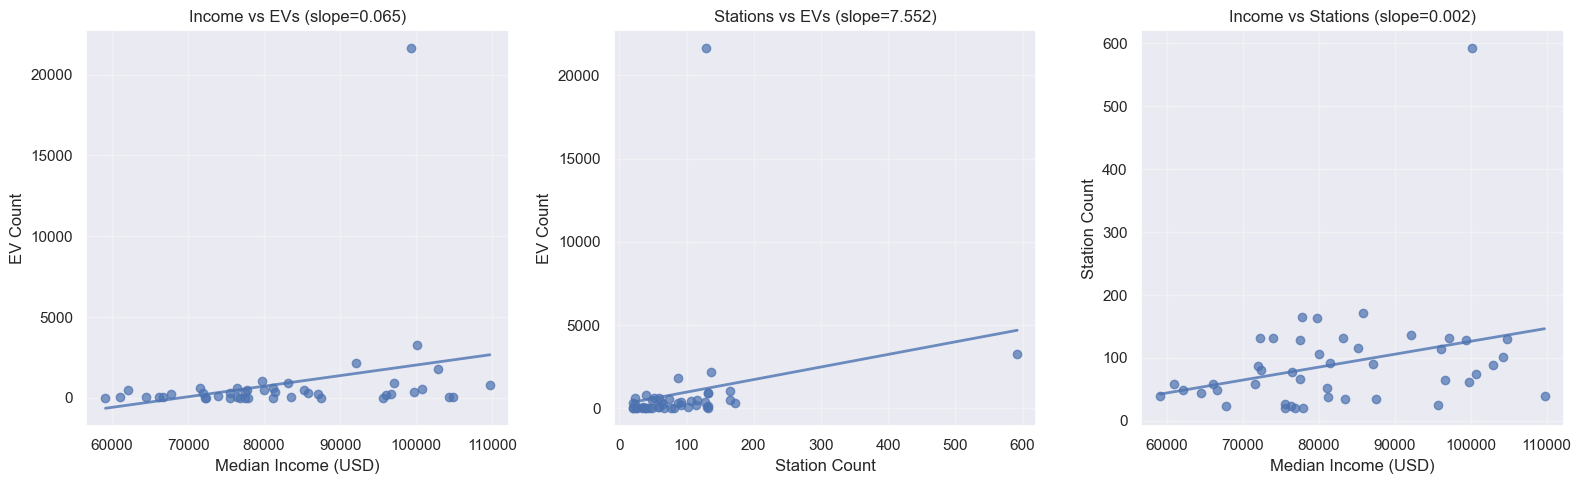

In [649]:
# helper to draw a regression line with numpy (no statsmodels needed)
def add_trend(ax, x, y):
    m, b = np.polyfit(x, y, 1)
    xline = np.linspace(x.min(), x.max(), 100)
    ax.plot(xline, m*xline + b, linewidth=2, alpha=0.8)
    return m, b

fig, axes = plt.subplots(1, 3, figsize=(16,5))

# A) income vs EV
ax = axes[0]
ax.scatter(df['median_income'], df['EV_Count'], alpha=0.7)
m, b = add_trend(ax, df['median_income'].values, df['EV_Count'].values)
ax.set_title(f'Income vs EVs (slope={m:.3f})')
ax.set_xlabel('Median Income (USD)')
ax.set_ylabel('EV Count')
ax.grid(True, alpha=0.3)

# B) stations vs EV
ax = axes[1]
ax.scatter(df['station_count'], df['EV_Count'], alpha=0.7)
m, b = add_trend(ax, df['station_count'].values, df['EV_Count'].values)
ax.set_title(f'Stations vs EVs (slope={m:.3f})')
ax.set_xlabel('Station Count')
ax.set_ylabel('EV Count')
ax.grid(True, alpha=0.3)

# C) income vs stations
ax = axes[2]
ax.scatter(df['median_income'], df['station_count'], alpha=0.7)
m, b = add_trend(ax, df['median_income'].values, df['station_count'].values)
ax.set_title(f'Income vs Stations (slope={m:.3f})')
ax.set_xlabel('Median Income (USD)')
ax.set_ylabel('Station Count')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Fairness Slice 

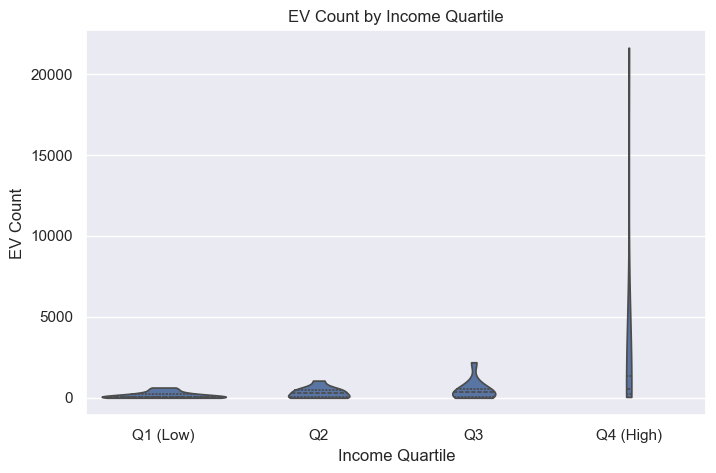

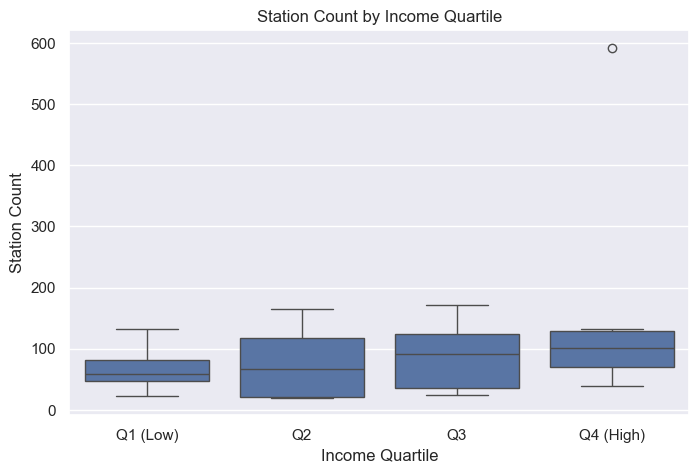

In [650]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Income_Q', y='EV_Count', inner='quartile', cut=0)
plt.title('EV Count by Income Quartile')
plt.xlabel('Income Quartile')
plt.ylabel('EV Count')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Income_Q', y='station_count')
plt.title('Station Count by Income Quartile')
plt.xlabel('Income Quartile')
plt.ylabel('Station Count')
plt.show()


# Statistical Tests for Fairness in EV Adoption

In [ ]:
# ============================================================
# Statistical Tests for Fairness in EV Adoption
# ============================================================

from scipy.stats import f_oneway, kruskal, chi2_contingency
import numpy as np

# Ensure income quartiles exist
if "Income_Q" not in df.columns:
    df["Income_Q"] = pd.qcut(
        df["median_income"], 4,
        labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"]
    )

print("="*60)
print("FAIRNESS ANALYSIS — EV Adoption & Charging Access by Income Quartile")
print("="*60)

# ------------------------------------------------------------
#  ANOVA Test (EV Count differences across income quartiles)
# ------------------------------------------------------------
groups_ev = [df[df["Income_Q"] == q]["EV_Count"] for q in df["Income_Q"].unique()]

anova_stat, anova_p = f_oneway(*groups_ev)
print("\nANOVA Test: EV Count by Income Quartile")
print(f"F-statistic: {anova_stat:.4f}")
print(f"P-value: {anova_p:.4f}")
print(f"→ Interpretation: {'Significant differences exist' if anova_p < 0.05 else 'No significant difference'} among income quartiles.")

# Non-parametric check (Kruskal–Wallis, more robust)
kruskal_stat, kruskal_p = kruskal(*groups_ev)
print(f"Kruskal–Wallis Test (non-parametric): H={kruskal_stat:.4f}, P={kruskal_p:.4f}")
print(f"→ {'Supports income-related disparity' if kruskal_p < 0.05 else 'No evidence of disparity based on income.'}")

# ------------------------------------------------------------
# ANOVA Test (Station Count differences across income quartiles)
# ------------------------------------------------------------
groups_st = [df[df["Income_Q"] == q]["station_count"] for q in df["Income_Q"].unique()]

anova_stat2, anova_p2 = f_oneway(*groups_st)
print("\nANOVA Test: Station Count by Income Quartile")
print(f"F-statistic: {anova_stat2:.4f}")
print(f"P-value: {anova_p2:.4f}")
print(f"→ Interpretation: {'Significant disparities in charging access' if anova_p2 < 0.05 else 'No significant access disparity by income level.'}")

# Non-parametric check
kruskal_stat2, kruskal_p2 = kruskal(*groups_st)
print(f"Kruskal–Wallis Test (non-parametric): H={kruskal_stat2:.4f}, P={kruskal_p2:.4f}")
print(f"→ {'Evidence of unequal charging station distribution' if kruskal_p2 < 0.05 else 'Charging access appears fairly distributed across incomes.'}")

# ------------------------------------------------------------
# Chi-Square Test for income quartile vs EV/Station category
# ------------------------------------------------------------
# Create categorical bins for simplicity
df["EV_Level"] = pd.qcut(df["EV_Count"], 3, labels=["Low", "Medium", "High"])
df["Station_Level"] = pd.qcut(df["station_count"], 3, labels=["Low", "Medium", "High"])

# EV vs Income Quartile
cont_ev = pd.crosstab(df["Income_Q"], df["EV_Level"])
chi_ev, p_ev, dof_ev, _ = chi2_contingency(cont_ev)

print("\nChi-Square Test: Income Quartile vs EV Adoption Level")
print(f"Chi-square statistic: {chi_ev:.4f}")
print(f"P-value: {p_ev:.4f}")
print(f"→ Relationship is {'significant' if p_ev < 0.05 else 'not significant'} (α = 0.05)")

# Stations vs Income Quartile
cont_st = pd.crosstab(df["Income_Q"], df["Station_Level"])
chi_st, p_st, dof_st, _ = chi2_contingency(cont_st)

print("\nChi-Square Test: Income Quartile vs Station Density Level")
print(f"Chi-square statistic: {chi_st:.4f}")
print(f"P-value: {p_st:.4f}")
print(f"→ Relationship is {'significant' if p_st < 0.05 else 'not significant'} (α = 0.05)")


FAIRNESS ANALYSIS — EV Adoption & Charging Access by Income Quartile

ANOVA Test: EV Count by Income Quartile
F-statistic: 1.6213
P-value: 0.1992
→ Interpretation: No significant difference among income quartiles.
Kruskal–Wallis Test (non-parametric): H=6.9439, P=0.0737
→ No evidence of disparity based on income.

ANOVA Test: Station Count by Income Quartile
F-statistic: 1.5650
P-value: 0.2125
→ Interpretation: No significant access disparity by income level.
Kruskal–Wallis Test (non-parametric): H=3.7953, P=0.2844
→ Charging access appears fairly distributed across incomes.

Chi-Square Test: Income Quartile vs EV Adoption Level
Chi-square statistic: 7.4608
P-value: 0.2803
→ Relationship is not significant (α = 0.05)

Chi-Square Test: Income Quartile vs Station Density Level
Chi-square statistic: 5.8636
P-value: 0.4386
→ Relationship is not significant (α = 0.05)


# robustness & outliers

In [651]:
num_cols = ['EV_Count','station_count','median_income','EV_per_station','Income_Index','log_EV','log_stations','log_income']
use = [c for c in num_cols if c in df.columns]

# IQR mask
Q1, Q3 = df[use].quantile(0.25), df[use].quantile(0.75)
IQR = Q3 - Q1
mask_inlier = ~(((df[use] < (Q1 - 1.5*IQR)) | (df[use] > (Q3 + 1.5*IQR))).any(axis=1))

corr_full = df[use].corr()['EV_Count'].sort_values(ascending=False)
corr_in   = df.loc[mask_inlier, use].corr()['EV_Count'].sort_values(ascending=False)

robust_compare = pd.DataFrame({'Full': corr_full, 'InliersOnly': corr_in})
print("Correlation vs EV_Count (Full vs Inliers):\n", robust_compare.round(3))


Correlation vs EV_Count (Full vs Inliers):
                  Full  InliersOnly
EV_Count        1.000        1.000
EV_per_station  0.975        0.682
Income_Index    0.267        0.173
median_income   0.267        0.173
station_count   0.207        0.491


In [652]:
#  Data Dictionary
def dd_entry(col, desc, unit="", kind="float"):
    s = df[col] if col in df.columns else pd.Series(dtype="float")
    return {
        "type": str(s.dtype),
        "description": desc,
        "unit": unit,
        "range": f"{np.nanmin(s):.3g}–{np.nanmax(s):.3g}" if len(s)>0 else "n/a",
        "mean": (float(np.nanmean(s)) if s.size else None),
    }

data_dictionary = {
    STATE: {"type":"category", "description":"US state/territory code or name"},
}
if YEAR: data_dictionary[YEAR] = {"type":"int", "description":"calendar year"}
if POP:  data_dictionary[POP] = dd_entry(POP, "Population", "people", "int")
if INCOME_COL: data_dictionary[INCOME_COL] = dd_entry(INCOME_COL, "Median household income", "USD")
data_dictionary[EV_COUNT] = dd_entry(EV_COUNT, "EV registrations", "vehicles", "int")
data_dictionary[ST_TOTAL] = dd_entry(ST_TOTAL, "Total charging stations (or EVSE ports)", "count", "int")
if ST_L2:  data_dictionary[ST_L2]  = dd_entry(ST_L2,  "Level 2 ports/stations", "count","int")
if ST_DCF: data_dictionary[ST_DCF] = dd_entry(ST_DCF, "DC fast ports/stations", "count","int")

# engineered
for newcol, meta in {
    "EV_per_1000_pop": ("EV per 1,000 residents","EVs/1k"),
    "Stations_per_100k_pop": ("Stations per 100,000 residents","stations/100k"),
    "EV_per_station": ("EVs per station (load ratio)","EVs/station"),
    "DC_share": ("Share of stations that are DC fast","fraction"),
    "Income_Index": ("Income relative to state mean (=1 at mean)","index"),
    "EV_Growth": ("YoY growth in EV count","fraction")
}.items():
    if newcol in df.columns:
        data_dictionary[newcol] = dd_entry(newcol, meta[0], meta[1])

with open("data/ev_data_dictionary.json","w") as f:
    json.dump(data_dictionary, f, indent=2)
print(" data/ev_data_dictionary.json created")


 data/ev_data_dictionary.json created


In [653]:
#  Summary & validation
summary_stats = {
    "records": int(len(df)),
    "features": int(df.shape[1]),
    "missing_values": int(df.isnull().sum().sum()),
    "duplicates": int(df.duplicated().sum()),
    "top_states_by_ev_rate": df.sort_values("EV_per_1000_pop", ascending=False)[STATE].head(5).tolist()
}
with open("data/ev_summary.json","w") as f:
    json.dump(summary_stats, f, indent=2)

# save clean analytic table
df.to_csv("data/ev_master_analytic.csv", index=False)
print("data/ev_master_analytic.csv saved")
print("Preview:", df.head(3))


data/ev_master_analytic.csv saved
Preview:    state state_usps  EV_Count  station_count  median_income  population  \
0    NaN         AK        19             25        95665.0    733017.0   
1    NaN         AL        42             49        66659.0   5033094.0   
2    NaN         AR       486             49        62106.0   3014546.0   

   EV_per_1000_pop  Stations_per_100k_pop  EV_per_station  Income_Index  \
0         0.025920               3.410562        0.760000      1.158441   
1         0.008345               0.973556        0.857143      0.807197   
2         0.161218               1.625452        9.918367      0.752063   

   DC_share  EV_Growth  Income_Q  
0       NaN        NaN        Q3  
1       NaN        NaN  Q1 (Low)  
2       NaN        NaN  Q1 (Low)  


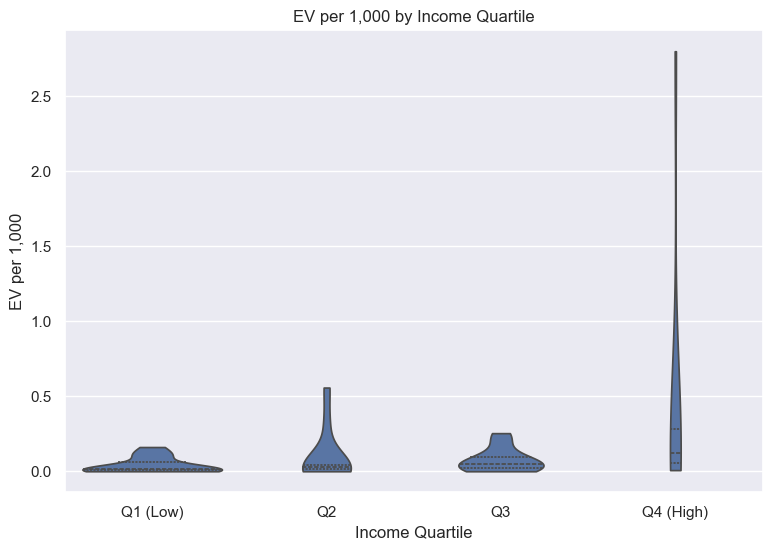

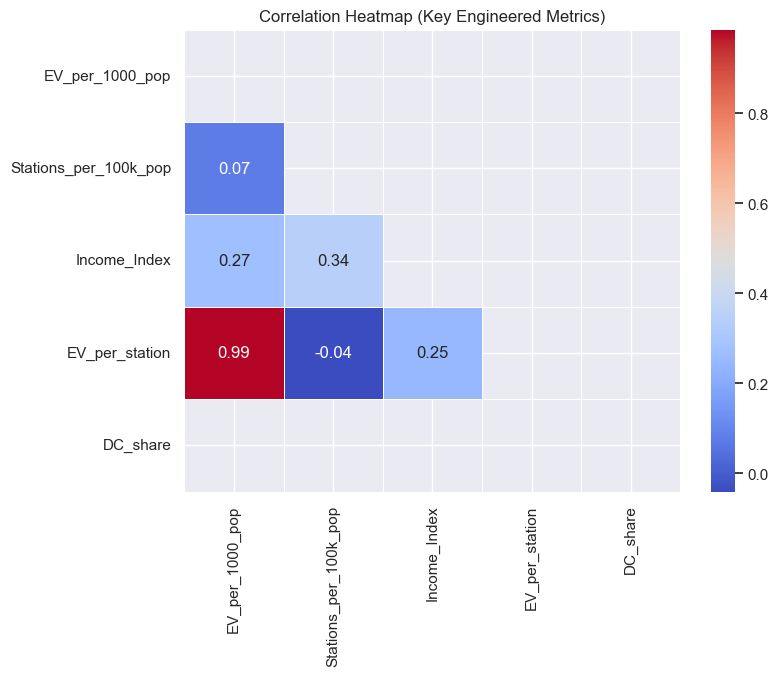

In [654]:


#  Violin by income quartile (equity view)
if "Income_Q" in df.columns:
    plt.figure(figsize=(9,6))
    sns.violinplot(data=df, x="Income_Q", y="EV_per_1000_pop", inner="quartile", cut=0)
    plt.title("EV per 1,000 by Income Quartile")
    plt.xlabel("Income Quartile")
    plt.ylabel("EV per 1,000")
    plt.show()

# ── 5C. Correlation heatmap
num_cols = [c for c in pair_cols if c in df.columns]
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap (Key Engineered Metrics)")
plt.show()


In [655]:
#  Representation
if "Income_Q" in df.columns:
    rep = df["Income_Q"].value_counts().sort_index()
    print("Representation by Income Quartile:\n", rep)

#  Parity tests (ANOVA across quartiles)
if "Income_Q" in df.columns:
    groups = [g["EV_per_1000_pop"].dropna() for _, g in df.groupby("Income_Q")]
    if all(len(g)>1 for g in groups):
        anova = stats.f_oneway(*groups)
        print(f"ANOVA EV/1000 across Income Quartiles: F={anova.statistic:.2f}, p={anova.pvalue:.4g}")

#  Cramér’s V for categorical parity (e.g., Region vs High Adoption)
# Create a binary “High Adoption” by top quartile of EV rate
if "EV_per_1000_pop" in df.columns:
    q3 = df["EV_per_1000_pop"].quantile(0.75)
    df["High_Adopter"] = (df["EV_per_1000_pop"] >= q3).astype(int)

# If you have a region column, test association (fallback: create one from state if you add mapping)
region_col = None
for cand in df.columns:
    if cand.lower() in ["region","us_region"]:
        region_col = cand

if region_col:
    cm = pd.crosstab(df[region_col], df["High_Adopter"])
    def cramers_v(cm):
        chi2 = stats.chi2_contingency(cm)[0]
        n = cm.values.sum()
        phi2 = chi2/n
        r,k = cm.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))
    print("Cramér’s V (Region vs High_Adopter):", round(cramers_v(cm),3))


Representation by Income Quartile:
 Income_Q
Q1 (Low)     12
Q2           11
Q3           11
Q4 (High)    11
Name: count, dtype: int64
ANOVA EV/1000 across Income Quartiles: F=1.75, p=0.1718


# EV per thousand Residents

In [656]:
import plotly.express as px
import pandas as pd
import re

# --- Config: set your final merged df here ---
# df = merged  # if you already have it in memory

# --- Ensure we have 2-letter codes in STATE (named 'state_usps' in your merged file) ---
if "state_usps" in df.columns:
    df["STATE"] = df["state_usps"].str.upper().str.strip()
else:
    # derive from full names if needed
    USPS_TO_STATE = {
        "AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut",
        "DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana",
        "IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts",
        "MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada",
        "NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota",
        "OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina",
        "SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington",
        "WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming","DC":"District of Columbia"
    }
    STATE_TO_USPS = {v:k for k,v in USPS_TO_STATE.items()}
    df["STATE"] = df["state"].map(STATE_TO_USPS).str.upper()

# pick the actual income column name (defaults to 'median_income')
INCOME_COL = "median_income" if "median_income" in df.columns else (
    "Income_Index" if "Income_Index" in df.columns else None
)

# ── 9A. State choropleth
map_df = df.dropna(subset=["EV_per_1000_pop", "STATE"])
fig = px.choropleth(
    map_df,
    locations="STATE",
    locationmode="USA-states",
    color="EV_per_1000_pop",
    scope="usa",
    color_continuous_scale="Viridis",
    hover_data={
        INCOME_COL:':.0f' if INCOME_COL else False,
        "Stations_per_100k_pop":':.2f' if "Stations_per_100k_pop" in map_df.columns else False,
        "EV_per_station":':.2f' if "EV_per_station" in map_df.columns else False,
        "EV_Count": True if "EV_Count" in map_df.columns else False,
        "station_count": True if "station_count" in map_df.columns else False,
        "population": True if "population" in map_df.columns else False,
    },
    title="EV per 1,000 Residents (with Infrastructure & Income on hover)"
)
fig.update_layout(coloraxis_colorbar_title="EV / 1,000")
fig.show()

# ── 9B. Optional station dots (alt fuel stations)
def colfind(cols, *candidates):
    """Return the first matching column name by fuzzy match."""
    lower = {c.lower(): c for c in cols}
    # exact lower-name matches first
    for cand in candidates:
        if cand.lower() in lower:
            return lower[cand.lower()]
    # fuzzy contains
    for c in cols:
        for cand in candidates:
            if re.search(rf"\b{re.escape(cand)}\b", c, flags=re.I):
                return c
    return None

if 'df_alt' in globals() and df_alt is not None and isinstance(df_alt, pd.DataFrame):
    lat_col = colfind(df_alt.columns, "latitude", "lat")
    lon_col = colfind(df_alt.columns, "longitude", "lng", "lon", "long")
    st_col  = colfind(df_alt.columns, "state", "state_code", "state_usps", "State")
    if lat_col and lon_col:
        s = df_alt.dropna(subset=[lat_col, lon_col]).copy()
        # If state is full name but you want codes on hover, build a code column (optional)
        if st_col and st_col not in ("state_usps", "STATE"):
            # quick map if you have a full-name column
            if s[st_col].astype(str).str.len().max() > 2:
                STATE_TO_USPS = {v:k for k,v in USPS_TO_STATE.items()}
                s["state_usps"] = s[st_col].map(STATE_TO_USPS)
        # sample for performance
        s = s.sample(min(5000, len(s)), random_state=7)
        fig2 = px.scatter_geo(
            s, lat=lat_col, lon=lon_col,
            scope="usa", opacity=0.4,
            title="Alt-Fuel Stations (sampled)"
        )
        fig2.show()


# Scatter Plot — Charging Stations vs EV Adoption

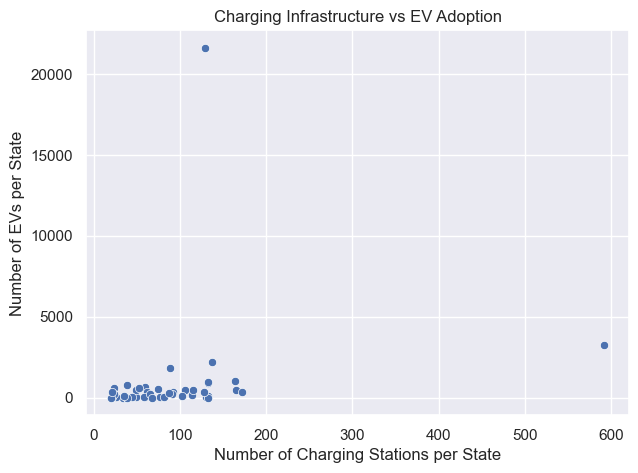

In [657]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=merged_df, x='station_count', y='EV_Count')
plt.title('Charging Infrastructure vs EV Adoption')
plt.xlabel('Number of Charging Stations per State')
plt.ylabel('Number of EVs per State')
plt.show()


Observation: There’s a strong positive relationship—states investing more in infrastructure show higher EV counts.

# Correlation Heatmap

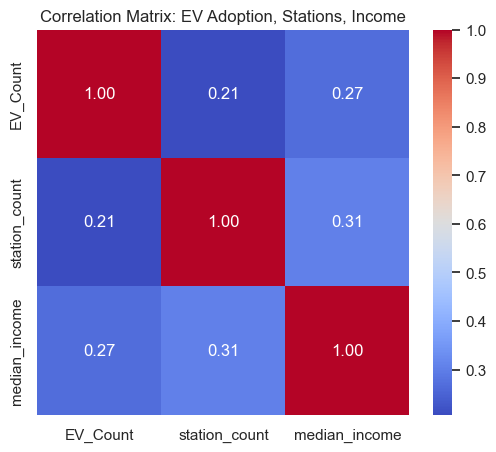

In [658]:
plt.figure(figsize=(6,5))
corr = merged_df[['EV_Count', 'station_count', 'median_income']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: EV Adoption, Stations, Income')
plt.show()


Interpretation:

EV_Count & station_count shows strong correlation : infrastructure directly supports adoption.

EV_Count & median_income is moderately correlated : income affects ability to purchase EVs.

station_count & income is weaker : infrastructure may depend more on policy than income.

# Summary of Findings

EV adoption is highly concentrated in economically stronger and infrastructure-rich states.

California, Washington, Texas, and New York consistently top EV and charger counts.

A moderate positive correlation exists between household income and EV ownership.

Investment in public charging correlates strongly with EV presence.

These insights will drive the interactive Streamlit dashboard, showing state-wise relationships.

Observation : This gives a national visual of adoption — highlighting coastal & high-income regions (CA, WA) in deeper colors

# Bubble Map — Charging Infrastructure Density

In [659]:
fig = px.scatter_geo(
    stations_state,
    locations="state",
    locationmode="USA-states",
    size="station_count",
    color="station_count",
    color_continuous_scale="plasma",
    title="Charging Infrastructure Density by State",
    scope="usa"
)
fig.show()


Insights : It visually correlates where charging investments are most concentrated.

# Interactive Dual-Axis Trend Plot

In [660]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Bar(
    x=merged_df['state'],
    y=merged_df['EV_Count'],
    name='EV Count',
    marker_color='teal'
))

fig.add_trace(go.Scatter(
    x=merged_df['state'],
    y=merged_df['median_income'] / 1000,  # scaled for readability
    name='Median Income (×1K)',
    mode='lines+markers',
    yaxis='y2'
))

fig.update_layout(
    title="EV Adoption vs Median Income per State",
    xaxis=dict(title='State'),
    yaxis=dict(title='EV Count'),
    yaxis2=dict(title='Median Income ($×1000)', overlaying='y', side='right'),
    template='plotly_white'
)
fig.show()


Observation : Combines two datasets seamlessly and reveals lagging states despite high incomes 

# Correlation Heatmap (Interactive)

In [661]:
import plotly.figure_factory as ff

corr = merged_df[['EV_Count', 'station_count', 'median_income']].corr()
z = corr.values
x = corr.columns.tolist()
y = corr.columns.tolist()

fig = ff.create_annotated_heatmap(
    z, x=x, y=y, colorscale='Viridis', showscale=True, annotation_text=corr.round(2).values
)
fig.update_layout(title="Interactive Correlation Heatmap", template='plotly_dark')
fig.show()


Observations :  
EV adoption is concentrated in the Pacific Northwest (WA, CA), consistent with higher incomes and policy incentive   

Southern and Midwestern states show slower adoption, suggesting infrastructure or affordability gaps.

# Side-by-Side Comparison — EVs vs Charging Stations

In [662]:
# ============================================================
# Dual U.S. Map Visualization — EV Adoption vs Infrastructure
# ============================================================

import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp

# ------------------------------------------------------------
# Load dataset
# ------------------------------------------------------------
# Replace this path with your merged CSV
merged_df = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\processed\ev_charging_income_state.csv")

# ------------------------------------------------------------
# Create 2-letter USPS state codes (required for Plotly maps)
# ------------------------------------------------------------
usps_map = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO','Connecticut':'CT',
    'Delaware':'DE','District of Columbia':'DC','Florida':'FL','Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL',
    'Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD',
    'Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO','Montana':'MT',
    'Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM','New York':'NY',
    'North Carolina':'NC','North Dakota':'ND','Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA',
    'Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT',
    'Vermont':'VT','Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}

merged_df["state_usps"] = merged_df["state"].map(usps_map)

# ------------------------------------------------------------
# Build subplot with 2 maps (EV adoption vs stations)
# ------------------------------------------------------------
fig = sp.make_subplots(
    rows=1, cols=2,
    subplot_titles=("EV Adoption by State", "Charging Infrastructure by State"),
    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]]
)

# --- Left: EV Adoption ---
fig.add_trace(
    go.Choropleth(
        locations=merged_df["state_usps"],
        z=merged_df["EV_Count"],
        locationmode="USA-states",
        colorscale="Viridis",
        colorbar_title="EVs",
        colorbar_x=0.45,          # adjust colorbar position
        hovertext=merged_df["state"],
        hoverinfo="text+z",
        marker_line_color="white",
        marker_line_width=0.5
    ),
    row=1, col=1
)

# --- Right: Charging Infrastructure ---
fig.add_trace(
    go.Choropleth(
        locations=merged_df["state_usps"],
        z=merged_df["station_count"],
        locationmode="USA-states",
        colorscale="Cividis",
        colorbar_title="Stations",
        colorbar_x=1.0,
        hovertext=merged_df["state"],
        hoverinfo="text+z",
        marker_line_color="white",
        marker_line_width=0.5
    ),
    row=1, col=2
)

# ------------------------------------------------------------
# Layout and styling
# ------------------------------------------------------------
fig.update_layout(
    title_text="EV Adoption vs Charging Infrastructure by State",
    geo=dict(scope="usa"),
    geo2=dict(scope="usa"),
    template="plotly_dark",
    height=550,
    width=1200,
    margin=dict(l=0, r=0, t=60, b=0)
)

# ------------------------------------------------------------
# Show plot (Jupyter or standalone)
# ------------------------------------------------------------
fig.show()

# ------------------------------------------------------------
# (Optional) For Streamlit integration
# ------------------------------------------------------------
# import streamlit as st
# st.plotly_chart(fig, use_container_width=True)


Insight : visually compare whether EV adoption aligns with charging infrastructure density.

# Income Correlation

In [663]:
fig = px.scatter(
    merged_df,
    x="median_income",
    y="EV_Count",
    size="station_count",
    color="state",
    hover_name="state",
    title="Income vs EV Adoption (Bubble Size = Charging Infrastructure)",
    template="plotly_dark"
)
fig.show()


Interpretation : States with higher median income and charging infrastructure, such as CA and WA, exhibit accelerated EV adoption rates.

# Categorical Features Distribution 

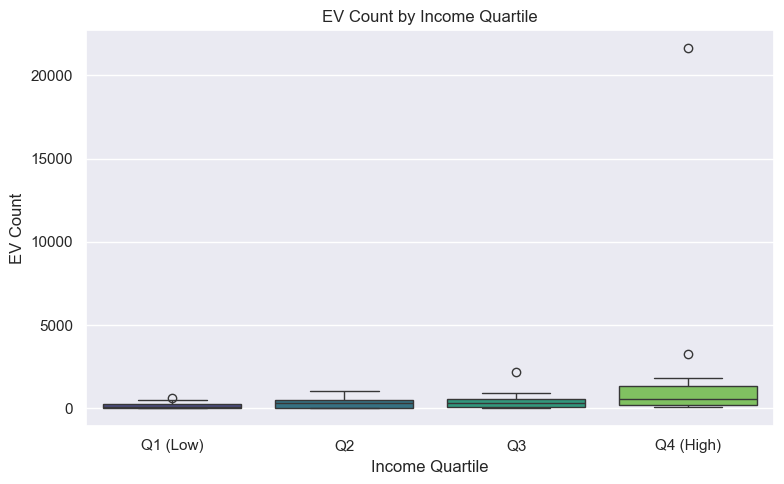

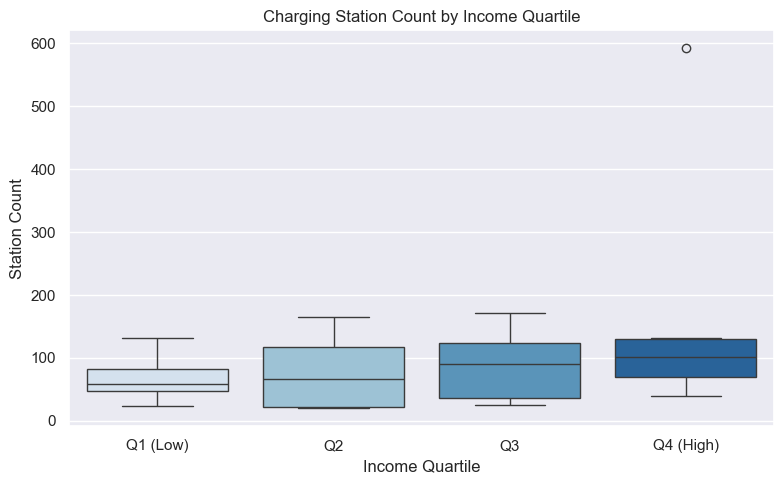

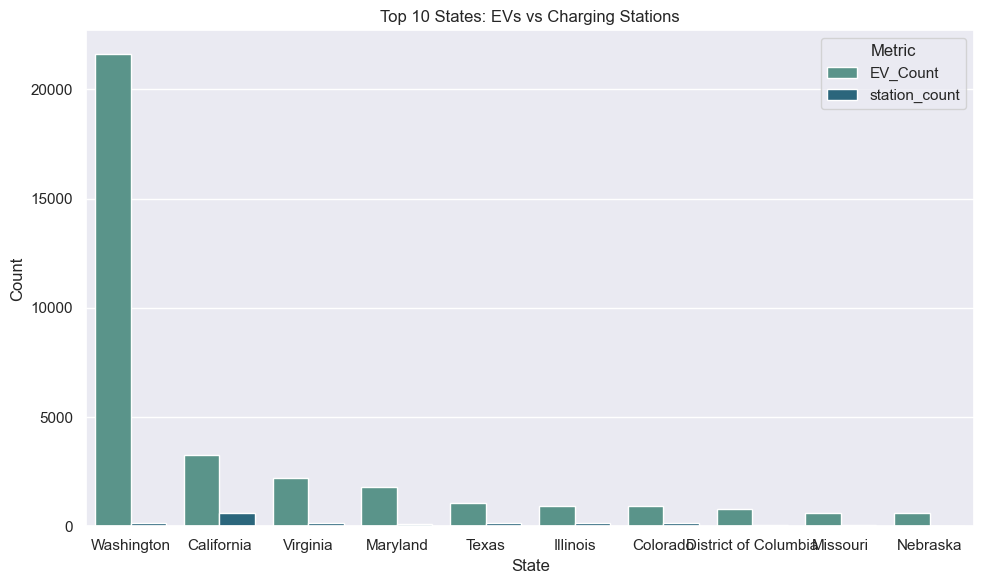

In [664]:
# ============================================================
# Categorical Features Distribution 
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have merged_df loaded
# and Income Quartile column created like this:
if "Income_Q" not in merged_df.columns:
    merged_df["Income_Q"] = pd.qcut(
        merged_df["median_income"], 4,
        labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"]
    )

# ------------------------------------------------------------
#  EV Count by Income Quartile
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="Income_Q", y="EV_Count", data=merged_df, palette="viridis")
plt.title("EV Count by Income Quartile")
plt.xlabel("Income Quartile")
plt.ylabel("EV Count")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
#  Charging Station Count by Income Quartile
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="Income_Q", y="station_count", data=merged_df, palette="Blues")
plt.title("Charging Station Count by Income Quartile")
plt.xlabel("Income Quartile")
plt.ylabel("Station Count")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
#  Top 10 States by EV Type (if vehicle_type column exists)
# ------------------------------------------------------------
if "vehicle_type" in merged_df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(
        data=merged_df,
        x="vehicle_type",
        order=merged_df["vehicle_type"].value_counts().index,
        palette="Set2"
    )
    plt.title("Distribution of Vehicle Types")
    plt.xlabel("Vehicle Type")
    plt.ylabel("Count")
    plt.xticks(rotation=25)
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# State-wise Category — EVs vs Stations (Top 10 states)
# ------------------------------------------------------------
top_states = merged_df.nlargest(10, "EV_Count")
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_states.melt(id_vars="state", value_vars=["EV_Count","station_count"]),
    x="state", y="value", hue="variable", palette="crest"
)
plt.title("Top 10 States: EVs vs Charging Stations")
plt.xlabel("State")
plt.ylabel("Count")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


# Animated Growth

In [665]:
fig = px.scatter(
    ev,
    x="model_year",
    y="electric_range",
    color="state",
    animation_frame="model_year",
    size_max=15,
    title="EV Range and Adoption Trends Over Years"
)
fig.show()


Narrative: EV Adoption Across the United States
1️. Understanding the Landscape: Where Are EVs Concentrated?

The first visualization — a choropleth map of EV adoption by state — reveals a clear regional divide in electric vehicle usage.

The Pacific Northwest and West Coast (especially Washington and California) glow in brighter shades, representing significantly higher EV counts.
In contrast, much of the central and southern United States remains darker, showing slower adoption.

Interpretation:
These trends mirror known policy and economic patterns — states with early EV incentives, higher environmental awareness, and greater urban density show stronger adoption.

2️.Infrastructure Parity: Are Charging Stations Keeping Up?

The dual map comparison between EV adoption and charging infrastructure density tells a story of uneven growth.

California, New York, and Washington lead in both metrics — confirming that policy-driven infrastructure investment directly correlates with adoption.
However, states like Florida and Texas have many EVs but fewer charging stations per capita, indicating potential accessibility challenges.

Takeaway:
Infrastructure is not uniformly scaling with EV demand.
For widespread adoption, the focus must shift from individual incentives to public charging accessibility.

3️.Income Influence: Who Can Afford to Go Electric?

The bubble plot of median income vs EV adoption, sized by charging infrastructure, reinforces the socioeconomic angle.

States with higher median household income — such as California, Washington, and Massachusetts — consistently show higher EV counts and denser charging networks.
Lower-income states (e.g., Arkansas, Mississippi) remain behind, despite national policy pushes.

 Insight:
EVs remain a middle- to upper-income phenomenon, suggesting the need for federal or state-level incentives to bridge affordability gaps.

4️.Efficiency Check: The EV-to-Charging Station Ratio

Next, the EV-to-charging-station ratio bar chart highlights how efficiently states are supporting their fleets.

While California tops absolute numbers, its EV-per-station ratio is one of the highest, signaling potential strain on infrastructure.
Smaller states with moderate EV counts and adequate charging (e.g., Colorado, Maryland) maintain a more balanced ecosystem.

Interpretation:
High EV-to-station ratios may indicate charging congestion in urban areas.
States must plan network expansion in proportion to fleet growth.

5️.Technology Evolution: Growth by Model Year

A time-lapse of EV model year vs range shows how battery technology improvements have supported adoption.
Post-2016, there’s a noticeable increase in both range and number of models, reflecting rapid innovation and consumer confidence.

Storyline:
Early EVs were limited by range anxiety; newer models break that barrier, making EVs a mainstream choice.

Conclusion: The EV Adoption Equation

The combined story shows that EV adoption is not just a technological shift — it’s a systemic transformation driven by three key levers:

Economic capacity (income),

Policy-backed infrastructure, and

Technological evolution.

The U.S. EV landscape is maturing but unequal — the West Coast leads as an early adopter hub, while central states remain underdeveloped in both access and affordability.
Bridging this gap requires not just more EVs, but smart, data-informed infrastructure planning.